# Linear Regression using Gradient Descent

By Laxman Singh Tomar

In this tutorial, I'll analyze and cover the workflow of Linear Regression. We'll first get ourselves comfortable with Gradient Descent and later using the same set of ideas we'll implement Linear Regression using the same approach.

---

# Contents

1. Introduction of Tutorial
    
    - Tutorial Objective
    
    - Importing Libraries
    
    
2. Context

    - Linear Regression Model
    
    - Loss Function
    
    - Gradient Descent
    
    
3. Code


4. Conclusions

---

# 1. Introduction of Tutorial

## 1.1 Tutorial Objective

To understand the underlying maths and intricacies behind Linear Regresssion with Gradient Descent; and to cement the concepts in my head my implementing them from scratch.

## 1.2 Importing Libraries

In [1]:
 # For data analysis
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

# Magic functions from Jupyter
# For inline plot
%matplotlib inline

#For printing versions
%reload_ext watermark

# For  making the notebook reload external python modules
%reload_ext autoreload
%autoreload 2

# For enabling retina(high resolution) plots
%config InlineBackend.figure_format = 'retina'

%watermark -p sklearn
%watermark -v -m --iversions

sklearn 0.21.2
pandas     0.24.2
numpy      1.16.4
matplotlib 3.1.0
CPython 3.7.3
IPython 7.6.1

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit


---

# 2. Context

For supervised learning problems like Linear Regression, the way it works is when given some set of numeric input variables, we wish to predict another set of numbers. For instance, given the number of bedrooms and the size of the house, we wish to predict the price in which the house will be sold. So, what we wanna know, is how much do "variables" such as the number of bedrooms or the size of the house affects the house's price. One easy approach is to calculate these "variables" by Gradient Descent. Another one is ordinary least squares. Here our prime focus is on the former only.

## 2.1 Linear Regression Model

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables $(x)$ and the single output variable $(y)$. More speciﬁcally, that y can be calculated from a linear combination of the input variables $(x)$. When there is a single input variable $(x)$, the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression. 

We will define a linear relationship between these two variables as follows:

$$y = mX + c$$ 

where $m$ is the slope and $c$ is the intercept or the bias term. Here we have only one input i.e. $x$. As you can recall the equation given is of a line. When we have multiple inputs the line is called hyperplane. Complexity of regression model is defined by the variables used in the model. When a coefficient becomes zero, it's influence on the input variable is nullified. Hence, when we aim to reduce the complexity of regression model what we mean is to making some coefficients zero. This is effectively what we call as Regularization.

Our goal is to determine the value of coefficients $m$ and $c$ such that the line corresponding to those values, returns the minimum error.

## 2.2 Loss Function

Loss is nothing but the error we get back when we plug in our predicted values of m and c. Our goal is to minimize this error in order to obtain as accurate as possible values of $m$ and $c$. For this, we'll make use of the Mean Squared Error Function to calculate the loss. There are three steps in this function:

1. Find the difference between the actual $y$ and predicted $y$ value for a given $x$ in equation $y = mx + c$.


2. Square the difference.


3. Find the mean of the squares for every value in $X$.


$$E = \frac{1}{n}\sum_{i=0}^{n}(y_i - \bar{y_i})^2$$

Here $y_i$ is the actual value and $\bar{y_i}$ is the predicted value. Substituting the value of $\bar{y_i}$:

$$E = \frac{1}{n}\sum_{i=0}^{n}(y_i-(mx_i+c))^2$$

Hence we square the error and find the mean, hence the name Mean Squared Error. Now, that we've defined the loss function, let's see how can we go about minimizing $m$ and $c$.

## 2.3 Gradient Descent

Let's understand it with the formula:

$$\text{Repeat until converge} \{ x:=x-\alpha\triangledown F(x) \}$$

- The notation := stands for overwriting the value on the left of := with values on the right of := .


- $\triangledown$ stands for the gradient of a function, which is the collection of all its partial derivatives into a vector (taking the first derivative of the function with respect to all possible x).


- $\alpha$ stands for the learning rate which is set manually.

Let’s break that down piece by piece. Putting the formula in plain English: Imagine gradient descent as when you’re at the top of a mountain and you want to get down to the very bottom, you have to choose two things. First the direction you wish to descend and second the size of the steps you wish to take. After choosing both of these things, you will keep on taking that step size and that direction until you reach the bottom. Now back to the formula. $\alpha$ corresponds to the size of the steps you wish to take and $\triangledown F(x$) gives you the direction that you should take for your given formula.

Let's try applying gradient descent to $m$ and $c$ and approach it in a step-by-step manner:

1. Initially, taking $m=0$ and $c=0$. Say, L be our learning rate or step size. It controls how much value of $m$ changes with each step. $L$ could be like 0.0001, 0.001, 0.1. Small L $\sim$ small steps $\sim$ more time to reach the optimum.


2. Calculate the partial derivative of the loss function with respect to $m$, and plug in the current values of $x$, $y$, $m$ and $c$ in order to obtain the derivative value $D$.

$$D_m = \frac{1}{n}\sum_{i=0}^{n}2(y_i-(mx_i+c))(-x_i)$$
$$D_m = \frac{-2}{n}\sum_{i=0}^{n}x_i(y_i-\bar{y_i})$$

- $D_m$ is the value of the partial derivative with respect to m. Similarly, let's find out the partial derivative with respect to $c$, $D_c$ :

$$D_c = \frac{-2}{n}\sum_{i=0}^{n}(y_i-\bar{y_i})$$


3. Now we update the current value of $m$ and $c$ using the following equations:

$$m = m - L \times D_m$$
$$c = c - L \times D_c$$


4. We will keep doing this again and again until our loss function becomes a really small/negligible value or ideally 0 signifying 0 error or 100% accuracy. The values of $m$ and $c$ that we're left with now will be the optimum values.

Now going back to our plain english understanding, $m$ can be considered as the current position of the person. $D$ is equivalent to the steepness of the slope and $L$ can be the speed with which he moves. Now the new value of $m$ that we are gonna calculate using the above equation will be his next position, and $L\times D$ will be the size of the steps he will take. When the slope is more steep ($D$ is large) he takes longer steps and when it is less steep ($D$ is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.

Now that we have the optimum values of $m$ and $c$ our model is ready to make predictions!

---

# 3. Code

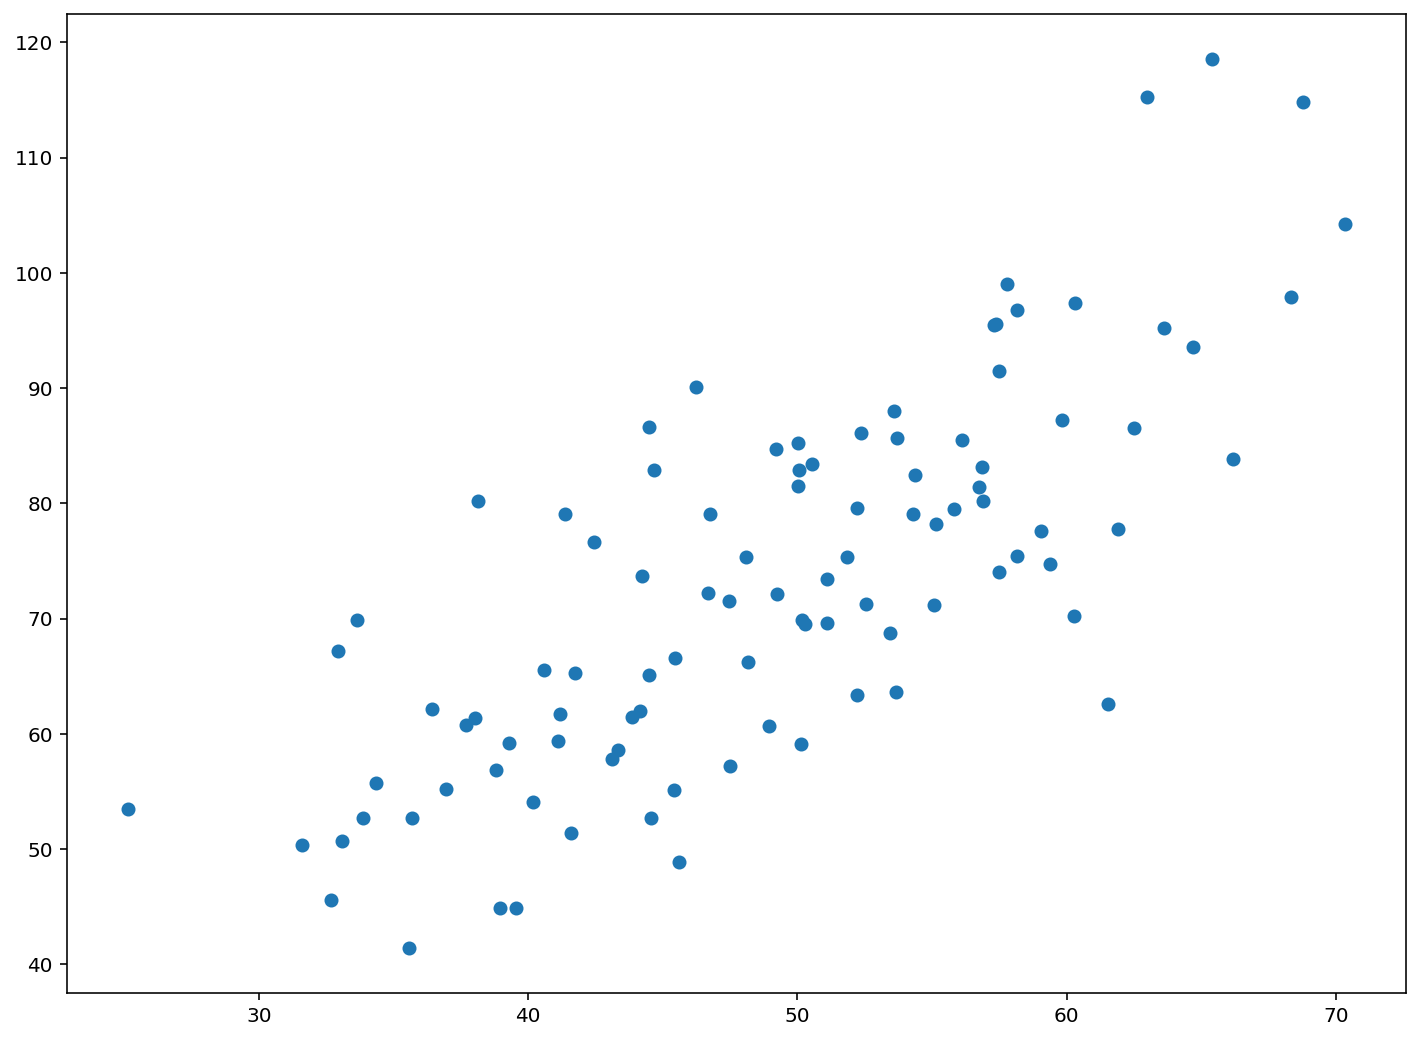

In [2]:
# Plotting the data
plt.rcParams['figure.figsize'] = (12.0,9.0)

data = pd.read_csv('data.csv')
X = data.iloc[:,0]
Y = data.iloc[:,1]
plt.scatter(X,Y)
plt.show()

In [3]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753726


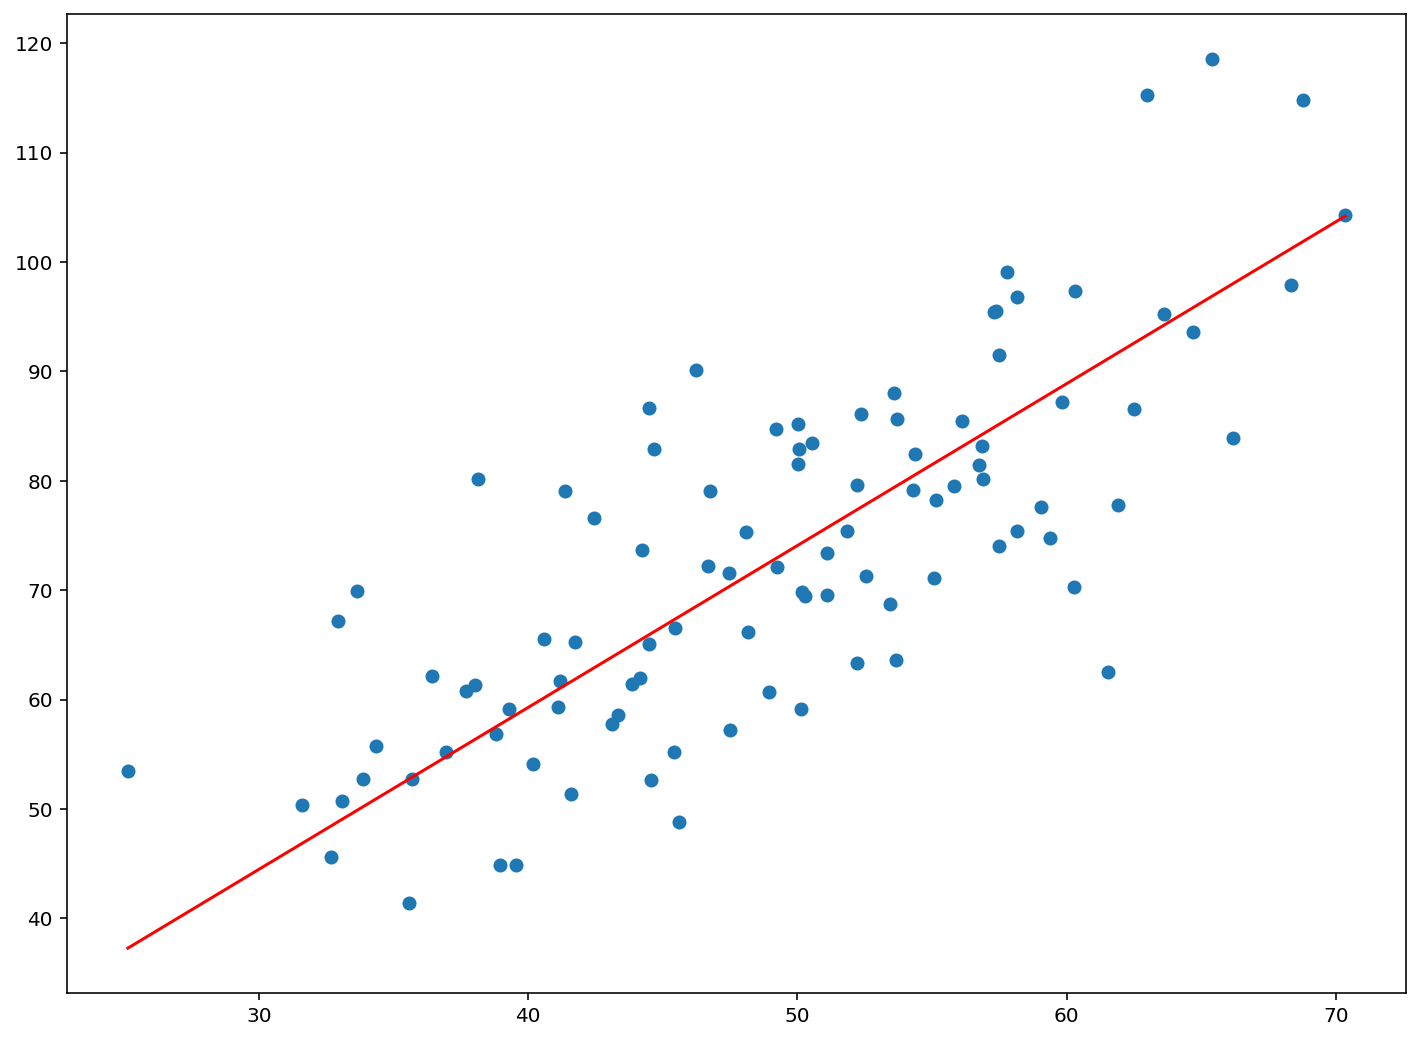

In [4]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

---

# 4. Conclusions

In this chapter you discovered the simple linear regression model and how to train it using gradient descent. You learned:


- How to work through the application of the update rule for gradient descent.


- How to make predictions using a learned linear regression model.

You now know how to implement linear regression using Gradient Descent.